In [4]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
nc = '/Users/aliaga/Documents/Work_DA/Py-packs/ranking-hy/data/d1/ds_5.nc'
data = xr.open_dataset(nc)

data

<xarray.Dataset>
Dimensions:   (id: 3, Dp: 52, day: 1826, hour: 289, Dp_interval: 1)
Coordinates: (10/11)
  * Dp        (Dp) float64 2.818e-09 3.162e-09 3.548e-09 ... 8.913e-07 1e-06
  * id        (id) object 'nais' 'dmps' 'nd'
  * hour      (hour) float64 -24.0 -23.75 -23.5 -23.25 ... 47.25 47.5 47.75 48.0
  * day       (day) datetime64[ns] 2018-01-01 2018-01-02 ... 2022-12-31
    is_day    (hour) bool ...
    ...        ...
    n_day     (Dp_interval, day) int64 ...
    n_night   (Dp_interval, day) int64 ...
    g         (Dp_interval, day) object ...
    q         (Dp_interval, day) float64 ...
    qCut      (Dp_interval, day) object ...
Dimensions without coordinates: Dp_interval
Data variables:
    dndlDp    (id, Dp, day, hour, Dp_interval) float64 ...
    N         (Dp_interval, day, hour) float64 ...
    lN        (Dp_interval, day, hour) float64 ...
    lN_s      (Dp_interval, day, hour) float64 ...
    N_s       (Dp_interval, day, hour) float64 ...
    max_lN    (Dp_interval, day) float64 ...
    min_lN    (Dp_interval, day) float64 ...
    d_lN      (Dp_interval, day) float64 ...

0

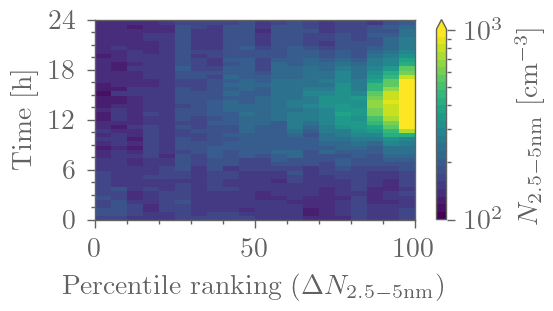

In [69]:
NN = r'$N_{2.5-5\mathrm{nm}} \ \mathrm{[cm^{-3}]}$'

#region sciplot
# noinspection PyUnresolvedReferences
import scienceplots
plt.style.use([
    'default',
    'acp',
    #'notebook',
    # 'sp-grid',
    'no-black',
    'illustrator-safe'
])

(
    data
    [['N_s']]
    .coarsen({'hour':2},boundary='pad').median()
    .assign_coords({'qr':lambda d:((d['q']+2.5)/5).round()*5-2.5})
    .groupby('qr')
    .median()
    .rename({'N_s':NN})
    [NN]

    .plot(
        x = 'qr',
        norm=mpl.colors.LogNorm(vmax=1.01e3,vmin=1e2),
        ylim=(0,24),
        cmap = plt.get_cmap('viridis',25)
    )
)
ax:plt.Axes = plt.gca()
ax.set_box_aspect(1/1.6)
ax.set_yticks(np.arange(0,25,6))
ax.set_ylabel('Time [h]')
ax.set_xlabel('Percentile ranking ($\\Delta N_{2.5-5\\mathrm{nm}}$)')
f:plt.Figure = plt.gcf()
f.set_size_inches(3,1.9)

import uscit
uscit.set_margin(f,x1=.5,y1=.5,y2=.4)
# uscit.set_fig_rule(f)
#region temp open fig
_p_ = 'f060_time_rank_N.pdf';plt.gcf().savefig(_p_,transparent=True);
os.system(f'open {_p_}')
#endregion temp open fig


In [7]:
rank = rank.iloc[:,2:5]

rank.columns = rank.columns.droplevel(-1)
rank

,g,q,qCut
day,,,
2018-01-01,g1,0.566394,"(0.0, 5.0]"
2018-01-02,g1,70.673379,"(70.0, 75.0]"
2018-01-03,g1,16.488357,"(15.0, 20.0]"
2018-01-04,g1,2.580239,"(0.0, 5.0]"
2018-01-05,g1,53.429830,"(50.0, 55.0]"
...,...,...,...
2022-12-27,,NaN,nan
2022-12-28,,NaN,nan
2022-12-29,,NaN,nan


In [8]:
rank['day'] = rank.index.values
rank.index.names = ['date']
rank

,g,q,qCut,day
date,,,,
2018-01-01,g1,0.566394,"(0.0, 5.0]",2018-01-01
2018-01-02,g1,70.673379,"(70.0, 75.0]",2018-01-02
2018-01-03,g1,16.488357,"(15.0, 20.0]",2018-01-03
2018-01-04,g1,2.580239,"(0.0, 5.0]",2018-01-04
2018-01-05,g1,53.429830,"(50.0, 55.0]",2018-01-05
...,...,...,...,...
2022-12-27,,NaN,nan,2022-12-27
2022-12-28,,NaN,nan,2022-12-28
2022-12-29,,NaN,nan,2022-12-29


In [9]:
#load number concentration between 2.5-5

n = pd.read_csv('hyytiälä_numconc_2p5_5nm_np.csv')
n.set_index('date', inplace=True)
n.index = pd.to_datetime(n.index)
n

FileNotFoundError: [Errno 2] No such file or directory: 'hyytiälä_numconc_2p5_5nm_np.csv'

In [9]:

n = n.resample('30T').median()

n['day'] = n.index.floor('D')

n['hour'] = n.index.hour + n.index.minute/60

df = pd.merge(n, rank, on='day')

df

/tmp/ipykernel_49071/3606629789.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n = n.resample('30T').median()


,2.5-5,hour,day,g,q,qCut
0,325.310753,0.0,2018-01-01,g1,0.566394,"(0.0, 5.0]"
1,324.353204,0.5,2018-01-01,g1,0.566394,"(0.0, 5.0]"
2,327.261854,1.0,2018-01-01,g1,0.566394,"(0.0, 5.0]"
3,342.429241,1.5,2018-01-01,g1,0.566394,"(0.0, 5.0]"
4,330.927728,2.0,2018-01-01,g1,0.566394,"(0.0, 5.0]"
...,...,...,...,...,...,...
83544,268.641502,12.0,2022-10-07,g1,46.003776,"(45.0, 50.0]"
83545,265.236897,12.5,2022-10-07,g1,46.003776,"(45.0, 50.0]"
83546,265.045511,13.0,2022-10-07,g1,46.003776,"(45.0, 50.0]"
83547,311.554828,13.5,2022-10-07,g1,46.003776,"(45.0, 50.0]"


In [10]:
label = np.arange(5,105,5)

df['Rank'] = pd.cut(
    x=df['q'],
    bins = np.arange(0,105,5),
    labels = label
    #labels=['0-10%','10-20%','20-30%','30-40%','40-50%',
     #       '50-60%','60-70%','70-80%','80-90%','90-100%'],
)

ls = label
df2 = pd.DataFrame(columns=ls,index=np.sort(df.hour.unique()))

i=0

for name, group in df.groupby('Rank'):
    data = group.drop(['q','day','g','qCut'],axis=1).groupby('hour').median()
    data.sort_index(inplace=True)
    df2[name] = data.values
    i=i+1
    
df2.sort_index(inplace=True)

df2

/tmp/ipykernel_49071/4211331041.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = group.drop(['q','day','g','qCut'],axis=1).groupby('hour').median()
/tmp/ipykernel_49071/4211331041.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = group.drop(['q','day','g','qCut'],axis=1).groupby('hour').median()
/tmp/ipykernel_49071/4211331041.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = group

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
0.0,255.947669,262.917609,221.100284,220.512563,226.049934,236.690298,243.798631,229.904969,245.713382,249.984744,231.794556,231.538480,226.429260,218.137810,201.782670,223.284790,237.951479,215.470937,244.951807,252.710105
0.5,243.909121,264.840544,221.075409,226.859501,231.241259,245.613467,245.288205,236.282519,244.522828,243.580337,226.537217,231.120708,226.423348,204.467916,199.595868,229.739696,240.757440,210.202495,229.598905,245.631928
1.0,250.453631,273.845581,238.626972,233.000248,228.779107,239.787047,237.937338,230.666782,238.275230,240.116941,219.194893,233.487067,216.460835,204.690487,212.194113,216.330686,238.976730,218.689286,218.359995,240.793618
1.5,250.453631,277.910859,241.241273,238.969688,238.771845,235.224435,241.704290,245.004668,233.629320,234.863745,221.194574,227.178862,217.068924,205.037058,209.938475,215.265669,234.135578,221.238043,224.672949,234.215218
2.0,250.453631,260.645683,243.946356,222.417390,247.609144,245.056689,239.039758,237.849077,228.852676,225.271963,219.539930,225.028760,215.754218,196.212852,215.081988,224.568846,246.253432,211.985000,220.392449,230.827487
2.5,257.076688,257.840325,243.585299,230.514758,236.369988,254.406979,227.449189,241.254372,231.476565,234.195838,222.964926,210.040417,220.745554,194.005520,204.796656,215.633928,243.889442,209.747890,217.234842,224.515504
3.0,263.416469,241.520050,238.200994,226.502485,231.546594,255.854114,221.066402,233.609677,243.775430,239.258964,218.674677,212.219502,222.624355,197.800119,203.160748,210.266974,238.029219,214.063003,218.216407,224.549910
3.5,255.306369,234.019121,226.485487,228.867432,233.657475,255.358626,216.842839,228.082235,232.915781,221.183667,212.677212,214.082135,223.460131,216.697326,217.716581,218.513136,234.300864,211.610886,210.409048,232.042240
4.0,260.890866,242.163052,229.006672,230.844841,242.128493,262.606586,224.611220,241.153406,239.516709,241.283788,215.799989,224.597286,230.810422,224.236716,220.312878,227.862782,227.877129,209.074440,212.113544,233.611967
4.5,257.048773,242.463888,214.634672,242.513557,241.559383,263.284354,221.895260,235.248558,233.950311,240.725976,219.096326,232.182650,240.351526,229.575158,221.011213,231.116936,223.563301,202.257345,210.686058,230.921862


In [11]:
plt.rcParams.update({'font.size': 24})
plt.rcParams["figure.figsize"] = (12,8)

/tmp/ipykernel_49071/118014082.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 25))


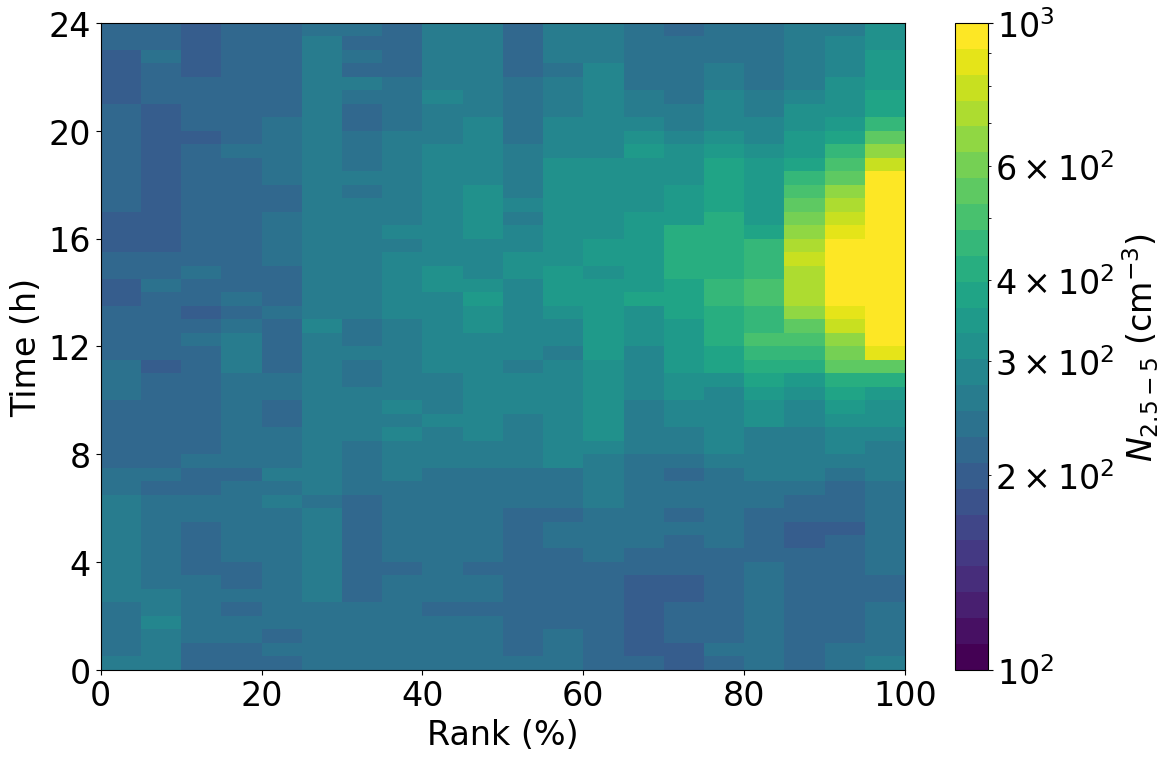

In [14]:
Z = df2.to_numpy()#.T
pcm = plt.pcolormesh(np.arange(0,105,5), np.append(df2.index.values,24), 
                    Z, 
                    norm=colors.LogNorm(vmin=1e2, vmax=1e3),
                    cmap=plt.cm.get_cmap('viridis', 25))

plt.ylabel('Time (h)')
plt.xlabel('Rank (%)')

plt.tight_layout()

cbar = (
    plt.colorbar(pcm, pad=0.05)
    .ax.set_ylabel(r'$N_{2.5-5} \ \mathrm{(cm^{-3})}$')
)
plt.yticks([0,4,8,12,16,20,24])

plt.savefig('may2023/ranks_vs_hour_hyytiälä.pdf',bbox_inches='tight')
